## Least-squares: fitting different models

In this interactive notebook you will fit several models to a time series of height observations of a point on a glacier, to assess whether it is melting. 

Click {fa}`rocket` --> {guilabel}`Live Code` on the top right corner of this screen and then wait until all cells are executed.

**Learning objectives:**
- set-up an observation model
- apply least-squares estimation
- assess the estimation results considering redundancy, squared norm of residuals, under- and overfitting

You have ```m``` = 12 monthly measurements of the height of a point on a glacier. The measurements are obtained from a satellite laser altimeter.

- Time [months]: ```t``` $=[0, 1, 2, \ldots, 11]$
- Observed heights [meters]: ```y``` $=[102.4, 98.2, 97.5, 97.9, 99.7, 100.7, 98.3, 94.2, 90.9, 86.1, 81.2, 76.9]$

```t``` and ```y``` and ```m``` are already defined, so you can directly use these variables in your code.

We will consider three different models, with the following observation equations:

- Model 1: constant velocity, $\mathbb{E}\left( Y_i \right) = x_0 + x_1 t_i$
- Model 2: eight order polynomial, $\mathbb{E}\left( Y_i \right) =x_0 + x_1 t_i + x_2 t_i^2 +\ldots+ x_8 t_i^8 = \sum_{p=0}^8 x_p t_i^p $
- Model 3: constant velocity + annual signal, $\mathbb{E}\left( Y_i \right) = x_0 + x_1 t_i + x_2 \cos \Big(\frac{2 \pi t_i}{12} \Big)$

In [ ]:
%pip install ipywidgets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import operator

import ipywidgets as widgets
from IPython.display import display

%matplotlib inline

def check_answer(variable_name, expected, comparison = operator.eq):
    output = widgets.Output()
    button = widgets.Button(description="Check answer")
    def _inner_check(button):
        with output:
            if comparison(globals()[variable_name], expected):
                output.outputs = [{'name': 'stdout', 'text': 'Correct!', 'output_type': 'stream'}]
            else:
                output.outputs = [{'name': 'stdout', 'text': 'Incorrect!', 'output_type': 'stream'}]
    button.on_click(_inner_check)
    display(button, output)

In [2]:
# times of observation [months]
t = np.arange(12)

# observed heights [m]
y = [102.4, 98.2, 97.5, 97.9, 99.7, 100.7, 98.3, 94.2, 90.9, 86.1, 81.2, 76.9]

m = len(t)

A_1_ans = np.column_stack((np.ones(m), t))
A_2_ans = np.column_stack((A_1_ans, t**2, t**3, t**4, t**5, t**6, t**7, t**8))
A_3_ans = np.column_stack((np.ones(m), t, np.cos(2*np.pi*t/12)))

def lsqe_ans(y,A):
    '''Apply least-squares estimation
    Input:
    y : vector with observations
    A : design matrix 
    '''
    # estimated parameters
    xhat = np.linalg.inv(A.T @ A) @ A.T @ y
    # adjusted observations
    yhat = A @ xhat
    # residuals
    ehat = y - yhat
    # squared norm of residuals
    eTe = ehat.T @ ehat
    
    return xhat, yhat, ehat, eTe

xhat_1_ans,yhat_1_ans,ehat_1_ans,eTe_1_ans = lsqe_ans(y,A_1_ans)
xhat_2_ans,yhat_2_ans,ehat_2_ans,eTe_2_ans = lsqe_ans(y,A_2_ans)
xhat_3_ans,yhat_3_ans,ehat_3_ans,eTe_3_ans = lsqe_ans(y,A_3_ans)

:::{card} Exercise 1

With ```column_stack``` you can combine arrays (column vectors) to create a matrix. The design matrices for the first two models are already given. Add the matrix for the third model yourself, and check your answer below.
:::

In [3]:
A_1 = np.column_stack((np.ones(m), t))
A_2 = np.column_stack((A_1, t**2, t**3, t**4, t**5, t**6, t**7, t**8))
A_3 = ?

In [4]:
check_answer("A_3",A_3_ans, np.array_equiv)

Button(description='Check answer', style=ButtonStyle())

Output()

:::{card}  Exercise 2

You can use the NumPy function ```np.linalg.inv``` to compute the inverse of a matrix. Recall that for a matrix product $\mathrm{A}\cdot \mathrm{B} $ you can use ```A @ B```. Complete the function below. The transpose $\mathrm{A}^T$ is obtained with ```A.T```.

First complete the function ```lsqe```, and check whether it is correct below.
:::

In [ ]:
def lsqe(y,A):
    '''Apply least-squares estimation
    Input:
    y : vector with observations
    A : design matrix 
    '''
    # estimated parameters
    xhat = ?
    # adjusted observations
    yhat = A @ xhat
    # residuals
    ehat = ?
    # squared norm of residuals
    eTe = ehat.T @ ehat
    
    return xhat, yhat, ehat, eTe

xhat_1,yhat_1,ehat_1,eTe_1 = lsqe(y,A_1)
xhat_2,yhat_2,ehat_2,eTe_2 = lsqe(y,A_2)
xhat_3,yhat_3,ehat_3,eTe_3 = lsqe(y,A_3)

print(f'Redundancy of linear trend model: {m - np.shape(A_1)[1]}')
print(f'Redundancy of 8th order polynomial model: {m - np.shape(A_2)[1]}')
print(f'Redundancy of linear trend + annual signal model: {m - np.shape(A_3)[1]}')

**Check whether ```xhat_1``` is correct (if not, you need to correct your ```lsqe``` function).**

In [6]:
check_answer("xhat_1",xhat_1_ans, np.array_equiv)

Button(description='Check answer', style=ButtonStyle())

Output()

**Check whether ```eTe_1``` is correct (if not, you need to correct your ```lsqe``` function).**

In [ ]:
check_answer("eTe_1",eTe_1_ans, np.array_equiv)

 ```{admonition} Solution
:class: tip, dropdown
In case your code did not work, here's the correct solution:

<code>xhat = np.linalg.inv(A.T @ A) @ A.T @ y</code>

<code>ehat = y-yhat</code>
```

**Now we obtain a plot with the observations and the three fitted models in one figure, and the residuals for each model in another figure.**

Squared norm of residuals model 1: 176.066
Squared norm of residuals model 2: 0.713
Squared norm of residuals model 3: 9.998


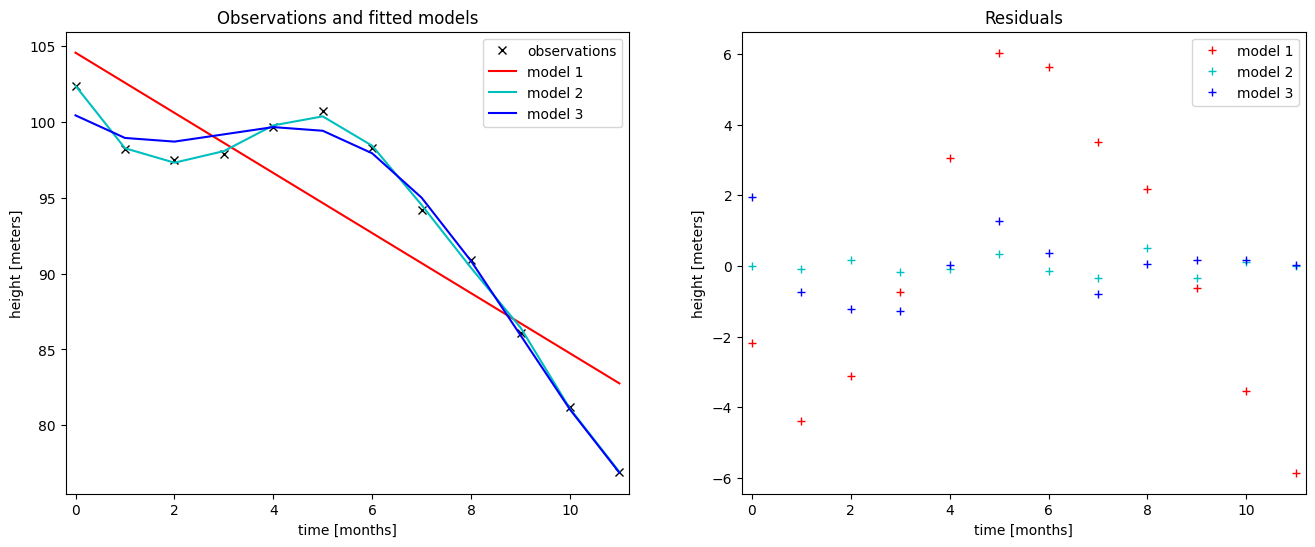

In [5]:
print(f'Squared norm of residuals model 1: {eTe_1_ans:.3f}')
print(f'Squared norm of residuals model 2: {eTe_2_ans:.3f}')
print(f'Squared norm of residuals model 3: {eTe_3_ans:.3f}')

fig, ax = plt.subplots(1, 2, figsize = (16, 6))
# left side plot : observations and fitted models
ax[0].plot(t, y, 'kx', label='observations')
ax[0].plot(t, yhat_1_ans, color='r', label='model 1')
ax[0].plot(t, yhat_2_ans, color='c', label='model 2')
ax[0].plot(t, yhat_3_ans, color='b', label='model 3')
ax[0].set_ylabel('height [meters]')
ax[0].set_xlabel('time [months]')
ax[0].set_title('Observations and fitted models')
ax[0].set_xlim(-0.2, (m-1)+0.2)
ax[0].legend()
# right side plot : residuals
ax[1].plot(t, ehat_1_ans, '+r', label='model 1')
ax[1].plot(t, ehat_2_ans, '+c', label='model 2')
ax[1].plot(t, ehat_3_ans, '+b', label='model 3')
ax[1].set_ylabel('height [meters]')
ax[1].set_xlabel('time [months]')
ax[1].set_title('Residuals')
ax[1].set_xlim(-0.2, 11.2)
ax[1].legend()
plt.show()